# Regressão Linear - Projeto

Parabéns! Você obteve algum contrato de trabalho com uma empresa de comércio eletrônico com sede na cidade de Nova York que vende roupas online, mas também tem sessões de consultoria em estilo e vestuário na loja. Os clientes entram na loja, têm sessões / reuniões com um estilista pessoal, então podem ir para casa e encomendarem em um aplicativo móvel ou site para a roupa que desejam.

A empresa está tentando decidir se deve concentrar seus esforços em sua experiência em aplicativos móveis ou em seu site. Eles contrataram você no contrato para ajudá-los a descobrir isso! Vamos começar!

Basta seguir as etapas abaixo para analisar os dados do cliente (é falso, não se preocupe, eu não lhe dei números reais de cartões de crédito ou e-mails).

## Imports
** Importe pandas, numpy, matplotlib,e seaborn. Em seguida, configure% matplotlib inline
(Você importará sklearn conforme você precisar). **

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

%matplotlib inline

## Obter dados

Trabalharemos com o arquivo csv do Ecommerce Customers da empresa. Possui informações do cliente, como Email, Endereço e sua cor Avatar. Em seguida, ele também possui colunas de valores numéricos:.

* Avg. Session Length: Tempo médio das sessões de consultoria de estilo na loja.
* Time on App: tempo médio gasto no app em minutos.
* Time on Website: tempo médio gasto no site em minutos.
* Lenght of Membership: Há quantos anos o cliente é membro.

** Leia no arquivo csv do Ecommerce Customers como um DataFrame chamado clientes. **

In [31]:
dados = pd.read_csv("EcommerceCustomers.csv")

** Verifique o cabeçalho dos clientes e confira os seus métodos info () e describe(). **

In [32]:
dados.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [33]:
dados.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [34]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [46]:
dados.drop(['Email','Address','Avatar'], axis=1, inplace=True)

## Análise de dados exploratória

**Vamos explorar os dados!**

Pelo resto do exercício, só estaremos usando os dados numéricos do arquivo csv.
___
**Use seaborn para criar um jointplot para comparar as colunas Time On Website e Volume anual. A correlação faz sentido?**

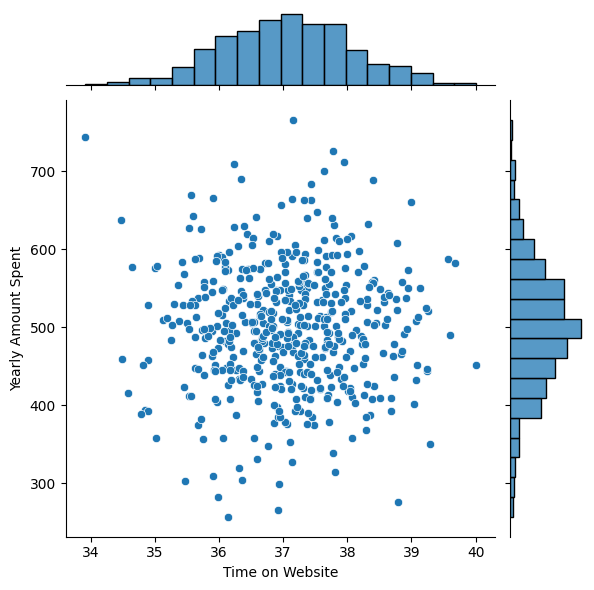

In [47]:
sns.jointplot(x='Time on Website', y='Yearly Amount Spent', data=dados)

Não há uma correlação clara entre o tempo gasto nos sites e o montante anual gasto. Uma correlação clara seria se ao aumentar o tempo gasto o gasto anual também aumentasse. Para garantir a correlação, podemos fazer o cálculo abaixo.

In [48]:
correlacao = dados['Time on Website'].corr(dados['Yearly Amount Spent'])
print(f'Correlação entre Time on Website e Yearly Amount Spent: {correlacao:.2f}')

Correlação entre Time on Website e Yearly Amount Spent: -0.00


Podemos ver, então, que não há correlação alguma. 

**Faça o mesmo, mas com a coluna tempo no aplicativo (Time on App), em vez disso.**

Text(0.1, 0.9, 'pearson: 0.50')

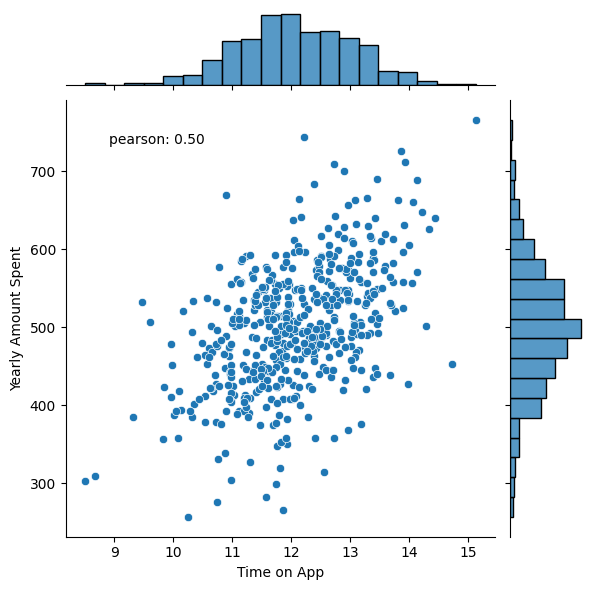

In [49]:

sns.jointplot(x='Time on App', y='Yearly Amount Spent', data=dados)
corr = pearsonr(dados['Time on App'], dados['Yearly Amount Spent'])
plt.annotate(f'pearson: {corr[0]:.2f}', xy=(0.1, 0.9), xycoords='axes fraction', fontsize=10)   

Podemos ver que há **sim** correlação entre o tempo que a pessoa passa no aplicativo e o quanto que ela gasta anualmente.  

**Use jointplot criar um lote de caixa hexagonal 2D que compara tempo no aplicativo (Time on App) e o tempo da associação (Length of Membership).**

Text(0.1, 0.9, 'pearson: 0.03')

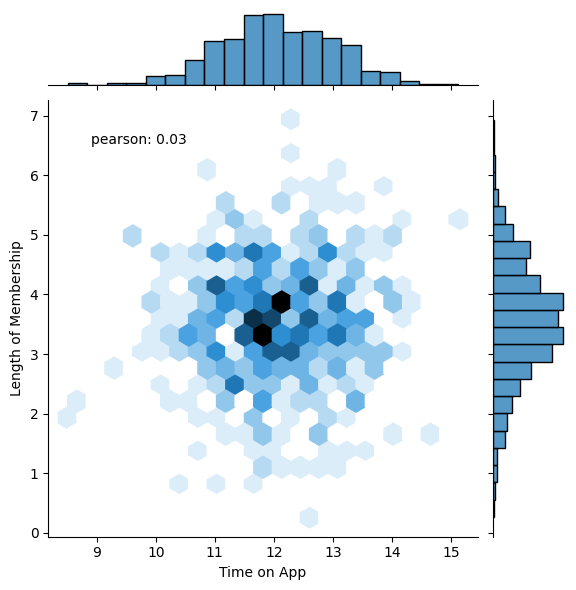

In [43]:
sns.jointplot(x='Time on App', y='Length of Membership', data=dados, kind='hex')
corr = pearsonr(dados['Time on App'], dados['Length of Membership'])
plt.annotate(f'pearson: {corr[0]:.2f}', xy=(0.1, 0.9), xycoords='axes fraction', fontsize=10)

Mais uma vez a correlação foi baixa. Mas, podemos ver qual é a correlação entre todas as variáveis numéricas do dataset.

In [52]:
correlacoes = dados.select_dtypes(include=[np.number]).corr()
print(correlacoes)

                      Avg. Session Length  Time on App  Time on Website  \
Avg. Session Length              1.000000    -0.027826        -0.034987   
Time on App                     -0.027826     1.000000         0.082388   
Time on Website                 -0.034987     0.082388         1.000000   
Length of Membership             0.060247     0.029143        -0.047582   
Yearly Amount Spent              0.355088     0.499328        -0.002641   

                      Length of Membership  Yearly Amount Spent  
Avg. Session Length               0.060247             0.355088  
Time on App                       0.029143             0.499328  
Time on Website                  -0.047582            -0.002641  
Length of Membership              1.000000             0.809084  
Yearly Amount Spent               0.809084             1.000000  


In [53]:
# Listando as maiores correlações (em valor absoluto), excluindo a diagonal
corr_matrix = correlacoes.abs()
corr_unstacked = corr_matrix.where(~np.eye(corr_matrix.shape[0], dtype=bool)).unstack()
top_corr = corr_unstacked.sort_values(ascending=False).drop_duplicates().head(5)
print("Maiores correlações entre variáveis:")
print(top_corr)

Maiores correlações entre variáveis:
Length of Membership  Yearly Amount Spent     0.809084
Yearly Amount Spent   Time on App             0.499328
                      Avg. Session Length     0.355088
Time on Website       Time on App             0.082388
Avg. Session Length   Length of Membership    0.060247
dtype: float64


As maiores correlações são entre *Yearly Amount Spent* com *Length of Membership* $(0.81)$, *Time on App* $(0.49)$ e *Avg. Session Length* $(0.35)$.

**Vamos explorar esses tipos de relações em todo o conjunto de dados. Use [parplot](https://stanford.edu/~mwaskom/software/seaborn/tutorial/axis_grids.html#plotting-pairwise-relationships-with-pairgrid-and-pairplot) para recriar o gráfico abaixo. (Não se preocupe com as cores)**

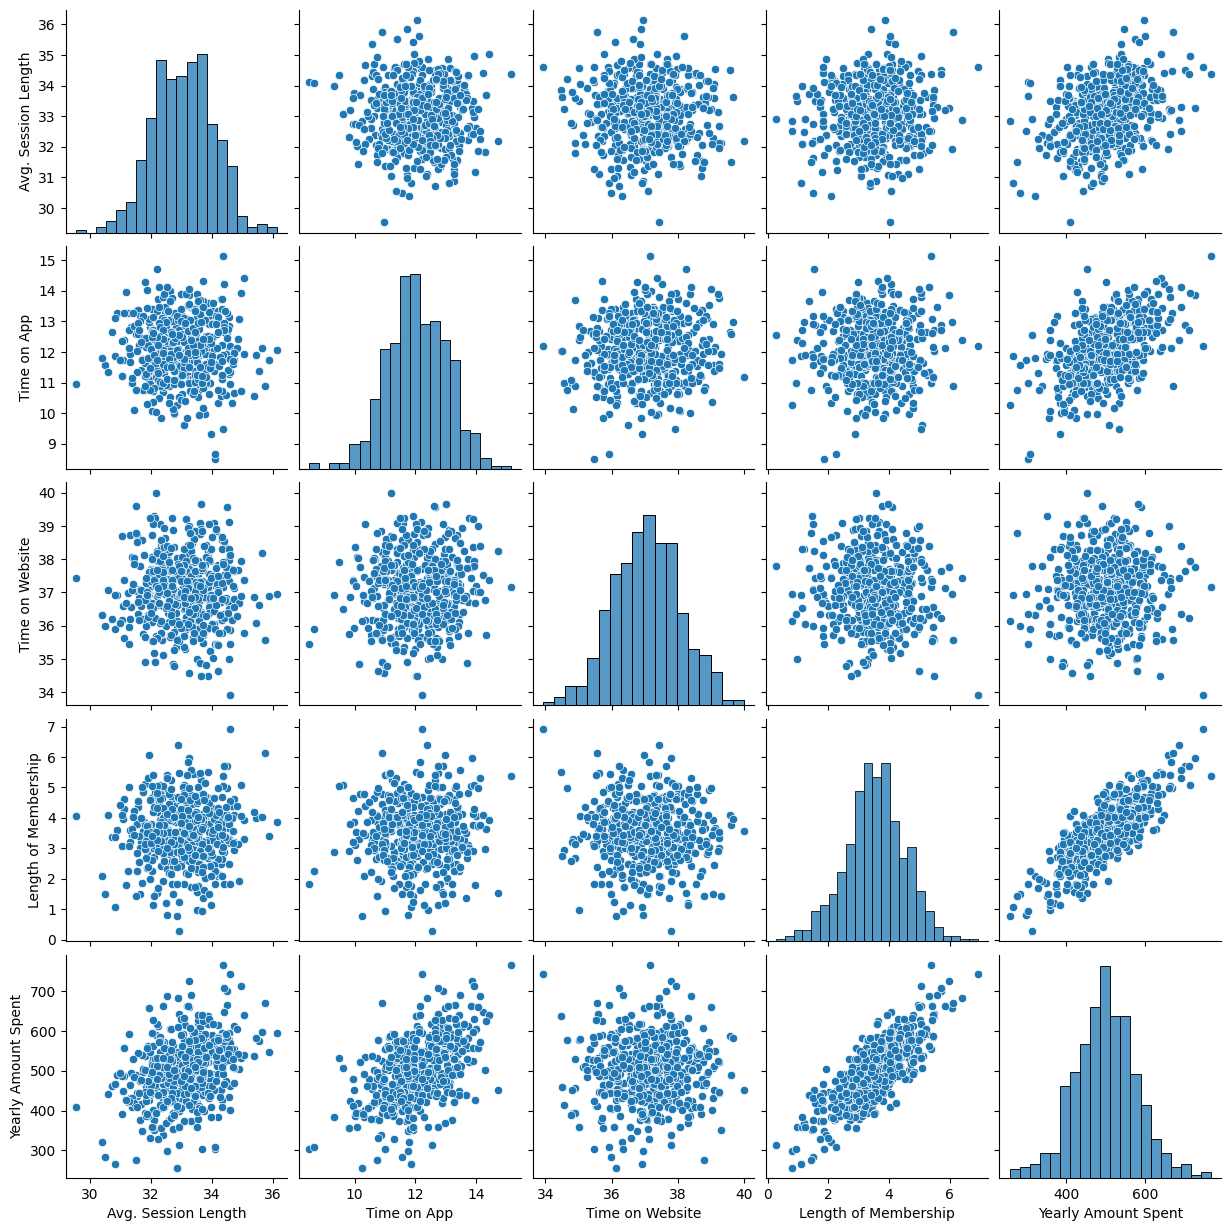

In [54]:
parplot = sns.pairplot(dados)

**Baseado neste plot o que parece ser a característica mais correlacionada com o valor anual gasto (Yearly Amount Spent)?**

Claramente aquelas que é mais correlacionada é a *Length of Membership*, já que os dados são o que mais chegam próximos de fazer uma linha reta.

**Crie um plot de um modelo linear (usando o lmplot de Seaborn) da quantia anual gasta (Yearly Amount Spent) vs. tempo de associação (Length of Membership).**

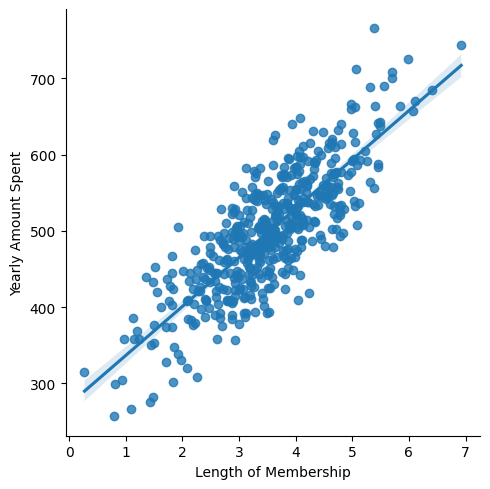

In [58]:
sns.lmplot(x='Length of Membership', y='Yearly Amount Spent', data=dados)

## Treinando e testando os dados

Agora que exploramos um pouco os dados, vamos avançar e dividir os dados em conjuntos de treinamento e teste.

**Defina uma variável X igual a todas as características numéricas dos clientes e uma variável y igual à coluna Valor anual gasto (Yearly Amount Spent).**

In [60]:
y = dados['Yearly Amount Spent']

In [61]:
x = dados[['Avg. Session Length', 'Time on App','Time on Website', 'Length of Membership']]

**Use model_selection.train_test_split da sklearn para dividir os dados em conjuntos de treinamento e teste. Defina test_size = 0.3 e random_state = 101**

In [64]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

## Treinando o modelo

Agora é hora de treinar nosso modelo em nossos dados de treinamento!

**Importe LinearRegression do sklearn.linear_model**

In [65]:
from sklearn.linear_model import LinearRegression

**Crie uma instância de um modelo LinearRegression () chamado lm.**

In [66]:
lm = LinearRegression()

**Treine lm nos dados de treinamento.**

In [67]:
lm.fit(x_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


**Print os coeficientes do modelo**

In [68]:
print(lm.coef_)

[25.72425621 38.59713548  0.45914788 61.67473243]


## Previsão de dados de teste
Agora que nos ajustamos ao nosso modelo, vamos avaliar o seu desempenho ao prever os valores de teste!

**Use lm.predict () para prever o conjunto X_test dos dados.**

In [69]:
lm.predict(x_test)

array([403.66993069, 542.57756289, 427.06591658, 502.02460425,
       410.12143559, 569.93442508, 531.93431341, 506.29650969,
       408.71870658, 473.97737105, 441.46912726, 425.33703059,
       425.1297229 , 527.61676714, 431.45684016, 424.0769184 ,
       575.76543296, 484.89856554, 458.35936863, 481.96502182,
       502.32441491, 513.63783554, 507.58877002, 646.57464283,
       450.24372141, 496.27043415, 556.40457807, 554.95630839,
       399.64237199, 325.84623136, 532.89783259, 478.12238702,
       501.05701845, 305.97335848, 505.77244448, 483.79591969,
       518.8331528 , 438.18241857, 456.71094234, 471.04609461,
       494.44008972, 445.31155755, 508.78802753, 501.04594193,
       488.83499673, 535.38079541, 595.20129802, 514.04714872,
       280.76758312, 433.10112367, 421.70823427, 481.23640152,
       584.71372272, 608.7748096 , 563.98513427, 494.72804869,
       394.52133407, 456.4197529 , 573.08767515, 499.6984241 ,
       512.83277025, 392.12434043, 480.05057697, 481.54

**Crie um diagrama de dispersão (scatterplot) dos valores reais de teste em relação aos valores preditos.**

<Axes: xlabel='Yearly Amount Spent'>

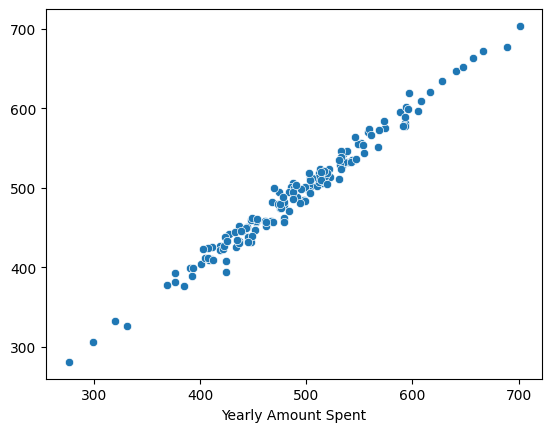

In [70]:
sns.scatterplot(x=y_test, y=lm.predict(x_test))

## Avaliando o Modelo

Vamos avaliar o desempenho do nosso modelo calculando a soma residual dos quadrados e o escore de variância explicado (R ^ 2).

**Calcule o erro absoluto médio, o erro quadrado médio e o erro quadrado médio da raiz. Consulte a palestra ou a Wikipédia para as fórmulas**

In [77]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, lm.predict(x_test))
mse = mean_squared_error(y_test, lm.predict(x_test))
rmse = np.sqrt(mse)
r2 = r2_score(y_test, lm.predict(x_test))

print("Erro Absoluto Médio:", mae)
print("Erro Quadrático Médio:", mse)
print("Erro Quadrático Médio (RMSE):", rmse)
print("R²:", r2)

Erro Absoluto Médio: 8.426091641432116
Erro Quadrático Médio: 103.91554136503333
Erro Quadrático Médio (RMSE): 10.193897260863155
R²: 0.9808757641125855


## Resíduos

Você deve ter obtido um modelo muito bom com um bom ajuste. Vamos explorar rapidamente os resíduos para garantir que tudo esteja bem com os nossos dados.

**Trace um histograma dos resíduos e certifique-se de que ele parece normalmente distribuído. Use o seaborn distplot, ou apenas o plt.hist ().**

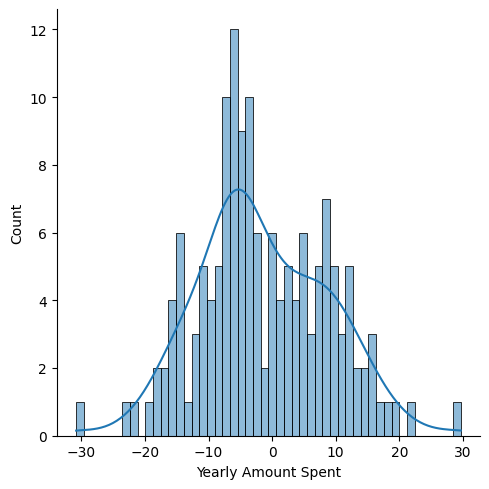

In [87]:
residuos = sns.displot((y_test - lm.predict(x_test)), bins=50, kde=True)

## Conclusão
Ainda desejamos descobrir a resposta à pergunta original, concentramos-nos no desenvolvimento de aplicativos móveis ou de sites? Ou talvez isso realmente não importe, e o tempo como membro é o que é realmente importante? Vamos ver se podemos interpretar os coeficientes para ter uma idéia.

** Recrie o quadro de dados abaixo. **

In [89]:
coeficientes = pd.DataFrame(lm.coef_, x.columns, columns=['Coeficientes'])
print(coeficientes)

                      Coeficientes
Avg. Session Length      25.724256
Time on App              38.597135
Time on Website           0.459148
Length of Membership     61.674732


**Como você pode interpretar esses coeficientes?**

Os coeficientes mostram que para uma alteração de uma unidade de tempo, cada variável se altera em "coeficientes" unidades. Coeficientes mais altos tem maior impacto na regressão, mostrando onde o foco deve estar. Nesse caso o tempo no site tem pouco impacto, enquanto o tempo da associação tem maior impacto. 

**Você acha que a empresa deve se concentrar mais em seu aplicativo móvel ou em seu site?**

De acordo com os coefientes, o foco deve ser no aplicativo móve, já que o seu coeficiente é, aproximadamente, 50 vezes maior. 